In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
data_path = '../data/'

In [5]:
fpt = pd.read_csv(data_path + 'FPT.csv', sep=',')

In [6]:
fpt['Date/Time'] = pd.to_datetime(fpt['Date/Time'])

In [7]:
fpt

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,2020-12-22 14:24:00,58.20,58.20,58.20,58.20,27470,0
97402,FPT,2020-12-22 14:25:00,58.20,58.20,58.20,58.20,14820,0
97403,FPT,2020-12-22 14:26:00,58.20,58.20,58.20,58.20,500,0
97404,FPT,2020-12-22 14:29:00,58.10,58.10,58.10,58.10,2500,0


In [8]:
fpt  = fpt[fpt["Date/Time"].dt.time == pd.to_datetime("14:46:00").time()]

In [15]:
fpt.drop(columns=['Open Interest'], inplace=True)

C:\Users\Theba\AppData\Local\Temp\ipykernel_21652\4158099958.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
fpt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 132 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         495 non-null    object        
 1   Date/Time      495 non-null    datetime64[ns]
 2   Open           495 non-null    float64       
 3   High           495 non-null    float64       
 4   Low            495 non-null    float64       
 5   Close          495 non-null    float64       
 6   Volume         495 non-null    int64         
 7   Open Interest  495 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 34.8+ KB


In [16]:
fpt.dropna()

,Ticker,Date/Time,Open,High,Low,Close,Volume
132,FPT,2018-12-26 14:46:00,30.89,30.89,30.89,30.89,23190
266,FPT,2018-12-27 14:46:00,31.19,31.19,31.19,31.19,38230
388,FPT,2018-12-28 14:46:00,31.49,31.49,31.49,31.49,156050
505,FPT,2019-01-02 14:46:00,30.74,30.74,30.74,30.74,64860
686,FPT,2019-01-03 14:46:00,30.44,30.44,30.44,30.44,27490
...,...,...,...,...,...,...,...
96564,FPT,2020-12-16 14:46:00,57.10,57.10,57.10,57.10,148530
96762,FPT,2020-12-17 14:46:00,56.50,56.50,56.50,56.50,7560
96975,FPT,2020-12-18 14:46:00,56.90,56.90,56.90,56.90,96550
97189,FPT,2020-12-21 14:46:00,57.50,57.50,57.50,57.50,92500


In [17]:
close_price = fpt['Close'].values

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(close_price))), y=close_price, mode='lines', name='Close price'))

fig.update_layout(title="Tổng quát giá đóng phiên cổ phiếu từ 12/2018->12/2020", xaxis_title="Thời gian", yaxis_title="Giá", legend=dict(x=0, y=1, traceorder='normal'))

fig.show() 


In [19]:
fpt

,Ticker,Date/Time,Open,High,Low,Close,Volume
132,FPT,2018-12-26 14:46:00,30.89,30.89,30.89,30.89,23190
266,FPT,2018-12-27 14:46:00,31.19,31.19,31.19,31.19,38230
388,FPT,2018-12-28 14:46:00,31.49,31.49,31.49,31.49,156050
505,FPT,2019-01-02 14:46:00,30.74,30.74,30.74,30.74,64860
686,FPT,2019-01-03 14:46:00,30.44,30.44,30.44,30.44,27490
...,...,...,...,...,...,...,...
96564,FPT,2020-12-16 14:46:00,57.10,57.10,57.10,57.10,148530
96762,FPT,2020-12-17 14:46:00,56.50,56.50,56.50,56.50,7560
96975,FPT,2020-12-18 14:46:00,56.90,56.90,56.90,56.90,96550
97189,FPT,2020-12-21 14:46:00,57.50,57.50,57.50,57.50,92500


### Create labels 

In [20]:
fpt['Labels'] = fpt['Close'].shift(-1)

C:\Users\Theba\AppData\Local\Temp\ipykernel_21652\141228439.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
fpt.drop(fpt.index[-1], inplace=True)

C:\Users\Theba\AppData\Local\Temp\ipykernel_21652\2344531422.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
fpt

,Ticker,Date/Time,Open,High,Low,Close,Volume,Labels
132,FPT,2018-12-26 14:46:00,30.89,30.89,30.89,30.89,23190,31.19
266,FPT,2018-12-27 14:46:00,31.19,31.19,31.19,31.19,38230,31.49
388,FPT,2018-12-28 14:46:00,31.49,31.49,31.49,31.49,156050,30.74
505,FPT,2019-01-02 14:46:00,30.74,30.74,30.74,30.74,64860,30.44
686,FPT,2019-01-03 14:46:00,30.44,30.44,30.44,30.44,27490,30.66
...,...,...,...,...,...,...,...,...
96351,FPT,2020-12-15 14:46:00,56.70,56.70,56.70,56.70,91390,57.10
96564,FPT,2020-12-16 14:46:00,57.10,57.10,57.10,57.10,148530,56.50
96762,FPT,2020-12-17 14:46:00,56.50,56.50,56.50,56.50,7560,56.90
96975,FPT,2020-12-18 14:46:00,56.90,56.90,56.90,56.90,96550,57.50


In [26]:
fpt.drop(['Date/Time', 'Ticker'], axis=1, inplace=True)

C:\Users\Theba\AppData\Local\Temp\ipykernel_21652\3946843915.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Normalize data

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
fpt = scaler.fit_transform(fpt)

In [33]:
len_trainset = int(len(fpt)*0.8)

In [34]:
X_train = fpt[: len_trainset, :-1]
y_train = fpt[: len_trainset, -1]
X_test = fpt[len_trainset: , :-1]
y_test = fpt[len_trainset: , -1]


In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(395, 5)
(395,)
(99, 5)
(99,)


## Initialize Models

### Linear regression

In [40]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
y_preds_lr = lr.predict(X_test)

In [42]:
# Đánh giá hiệu quả mô hình
mae = mean_absolute_error(y_test, y_preds_lr)
mse = mean_squared_error(y_test, y_preds_lr)
r2 = r2_score(y_test, y_preds_lr)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.018024209532123827
MSE: 0.000534318439846239
R2: 0.9579697555479393


### Random Forest

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_preds_rf = rf.predict(X_test)

In [46]:
# Đánh giá hiệu quả mô hình
mae = mean_absolute_error(y_test, y_preds_rf)
mse = mean_squared_error(y_test, y_preds_rf)
r2 = r2_score(y_test, y_preds_rf)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.07051301153253427
MSE: 0.010407142063061212
R2: 0.18135948090494236


### XGboost

In [48]:
# Huấn luyện mô hình XGBoost
xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [49]:
y_preds_xgb = xgb.predict(X_test)

In [50]:
# Đánh giá hiệu quả mô hình
mae = mean_absolute_error(y_test, y_preds_xgb)
mse = mean_squared_error(y_test, y_preds_xgb)
r2 = r2_score(y_test, y_preds_xgb)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.0700517592387312
MSE: 0.009754592176602276
R2: 0.23268997822584003


### Plotting the predicted and actual values

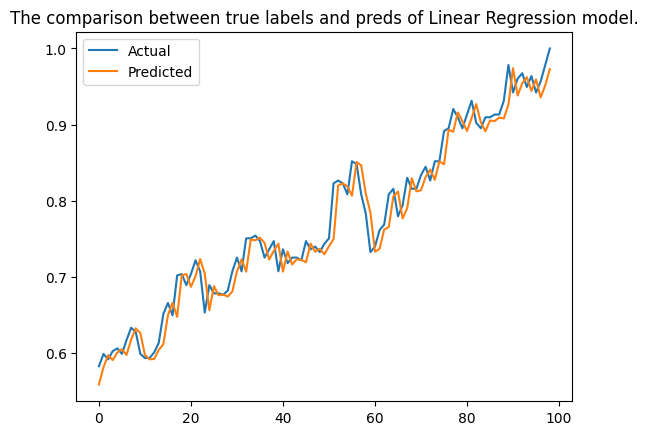

In [57]:
plt.plot(y_test, label = 'Actual')
plt.plot(y_preds_lr, label = 'Predicted')
plt.title('The comparison between true labels and preds of Linear Regression model.')
plt.legend()
plt.show()

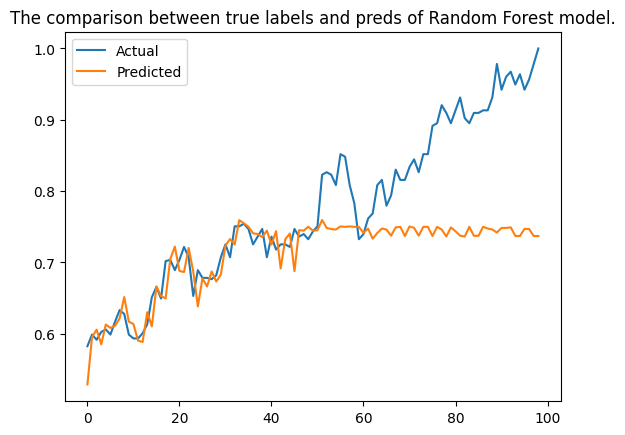

In [59]:
plt.plot(y_test, label = 'Actual')
plt.plot(y_preds_rf, label = 'Predicted')
plt.title('The comparison between true labels and preds of Random Forest model.')
plt.legend()
plt.show()

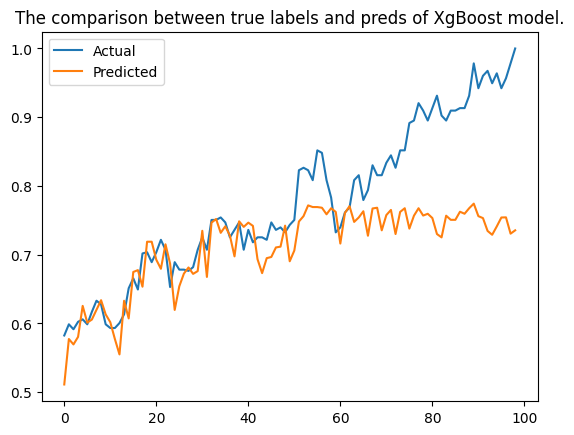

In [60]:
plt.plot(y_test, label = 'Actual')
plt.plot(y_preds_xgb, label = 'Predicted')
plt.title('The comparison between true labels and preds of XgBoost model.')
plt.legend()
plt.show()